#Week 11 - K-Means Clustering

##1. Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

#2. load dataset

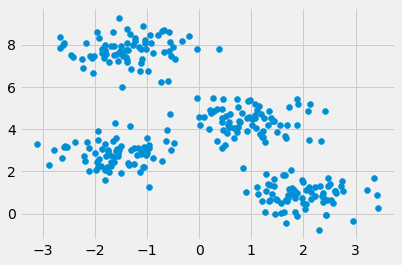

In [ ]:
X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

#n_samples : jml data
#centers : jml clusters
#cluster_std : std cluster

plt.scatter(X[:,0], X[:,1])

#3. determina number of clusters

##method 1 - elbow method

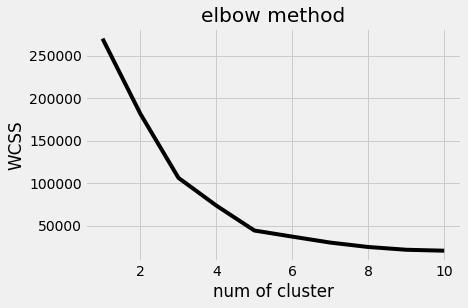

In [ ]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, c='k')
plt.title('elbow method')
plt.xlabel('num of cluster')
plt.ylabel('WCSS')
plt.show()

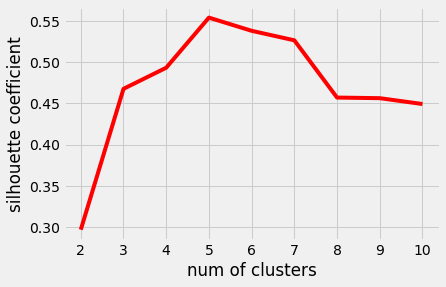

In [ ]:
silhouette_coefficients = []
for i in range (2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X,kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette_coefficients,c='r')
plt.xticks(range(2,11))
plt.xlabel('num of clusters')
plt.ylabel('silhouette coefficient')
plt.show()

#4. create cluster

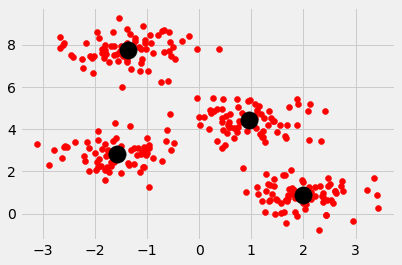

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c='r')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='k')
plt.show()

#5. clusterring with df

In [ ]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


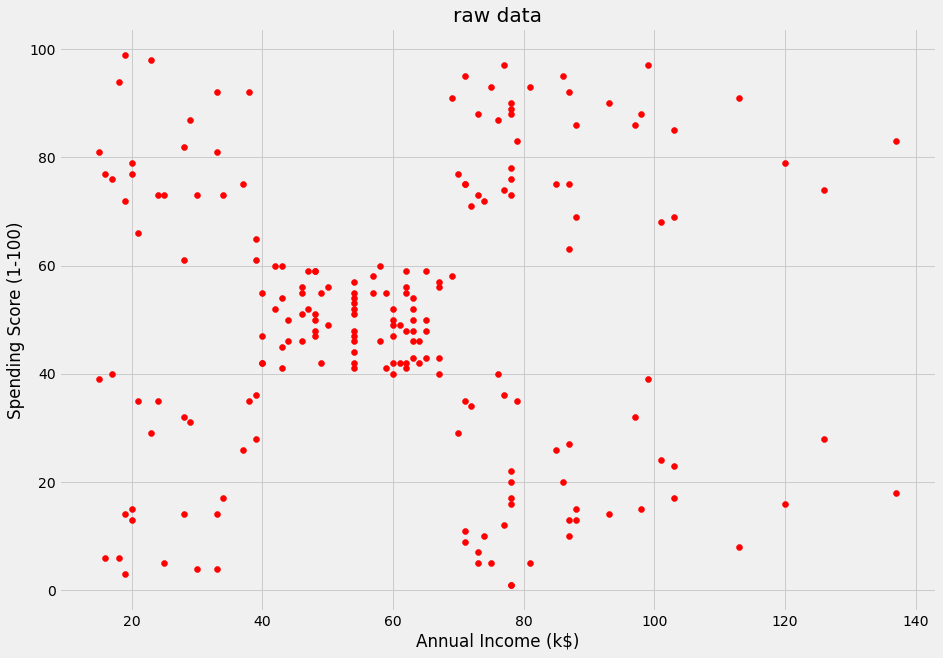

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c='r')
plt.title('raw data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

NameError: ignored

In [ ]:
X = np.array(df.iloc[:, [3,4]])
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

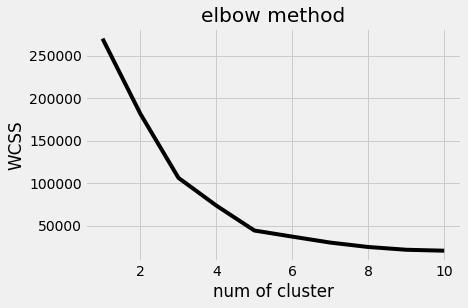

In [ ]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, c='k')
plt.title('elbow method')
plt.xlabel('num of cluster')
plt.ylabel('WCSS')
plt.show()

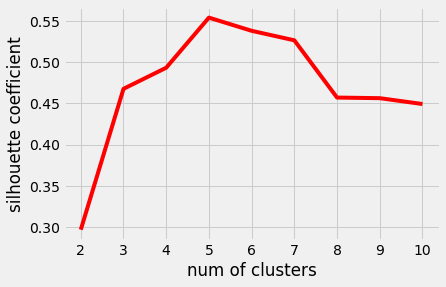

In [ ]:
silhouette_coefficients = []
for i in range (2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X,kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette_coefficients,c='r')
plt.xticks(range(2,11))
plt.xlabel('num of clusters')
plt.ylabel('silhouette coefficient')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
kmeans_pred = kmeans.fit_predict(X)
kmeans_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

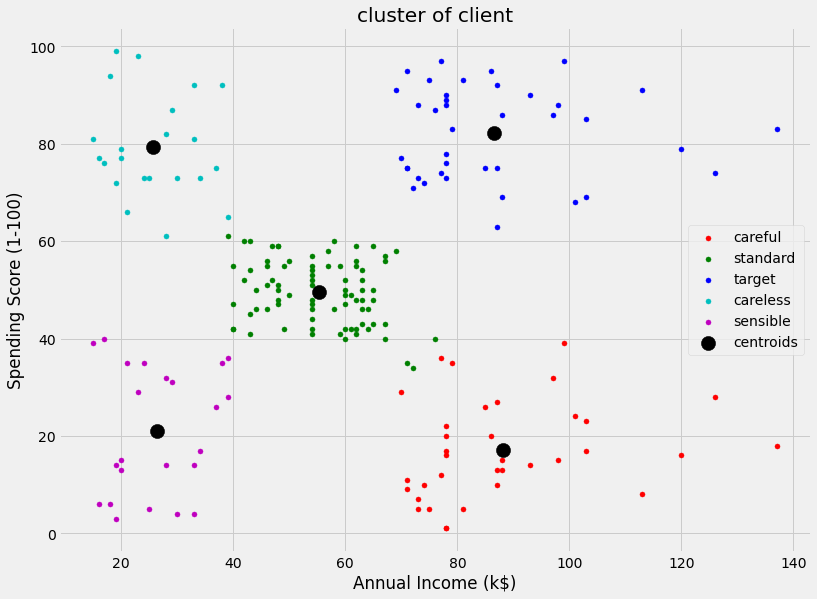

In [ ]:
point_size = 25
col = ['r','g','b','c','m']
lbl = ['careful','standard','target','careless','sensible']

plt.figure(figsize = (12,9))
for i in range(5):
  plt.scatter(X[kmeans_pred ==i,0], X[kmeans_pred ==i,1], s=point_size, c=col[i], label=lbl[i])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='k', label='centroids')
plt.title('cluster of client')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best')
plt.show()

In [ ]:
df['Cluster']=kmeans_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
df.groupby(['Cluster'])['Cluster'].count()

Cluster
0    35
1    81
2    39
3    22
4    23
Name: Cluster, dtype: int64

In [ ]:
df.loc[df['Cluster']==1].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,44,Female,31,39,61,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1


In [ ]:
import plotly as py
import 